In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9668,33302032.0000,5770.7915,0.8011,0.4683,0.4153
1,4503.7373,43746484.0000,6614.1123,0.7456,0.5633,0.4217
2,3880.5542,31795154.0000,5638.7192,0.5974,0.7645,0.4396
3,3747.6450,26805306.0000,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7559,36166336.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1018,39192588.0000,6260.3984,0.7333,0.6434,0.4241
7,4928.1533,46415028.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3140,40370352.0000,6353.7666,0.7392,0.5686,0.5111
9,4665.8652,42596792.0000,6526.6216,0.7256,0.8131,0.4802


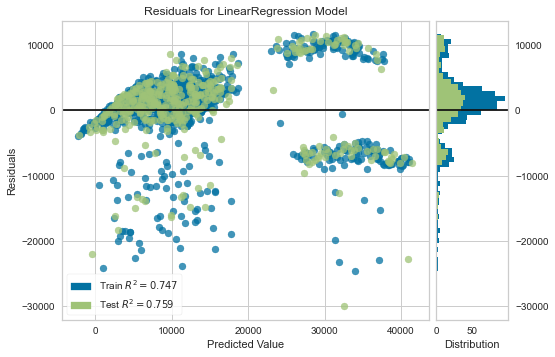

In [5]:
plot_model(lr)

# Experiment 2

In [6]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [7]:
s2[0].columns

AttributeError: 'str' object has no attribute 'columns'

In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3080.5259,21362820.0000,4621.9932,0.8724,0.4133,0.3280
1,3405.0508,31559838.0000,5617.8145,0.8165,0.4286,0.3206
2,2985.2920,23914190.0000,4890.2139,0.6972,0.5783,0.3796
3,3131.9438,20934180.0000,4575.3887,0.8252,0.4750,0.4442
4,3385.6995,29317690.0000,5414.5811,0.7819,0.4593,0.3177
5,3251.9482,26735140.0000,5170.6035,0.8280,0.4569,0.3045
6,3014.6270,27070244.0000,5202.9072,0.8158,0.3822,0.3140
7,3540.9238,31011576.0000,5568.8037,0.8295,0.4962,0.3280
8,3225.1982,23171992.0000,4813.7295,0.8503,0.4036,0.3572
9,3382.1775,29852028.0000,5463.7012,0.8077,0.5222,0.3731


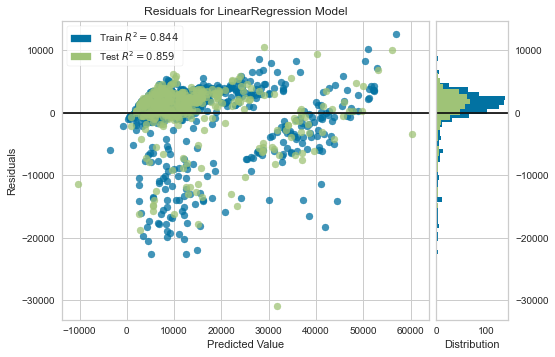

In [9]:
plot_model(lr)

In [10]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [11]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [12]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

In [13]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
